In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os

In [2]:
# to modify based on the data directory
root_directory = os.getcwd().removesuffix('notebooks')
data_path = r'D:/Data/d18o_so/'
fig_path = root_directory + '/figures/optimization/'

In [3]:
import sys
sys.path.append(root_directory + 'scripts/') # go to parent dir

import usefull_functions as uf

%load_ext autoreload
%autoreload 2

In [4]:
if not os.path.exists(fig_path): os.mkdir(fig_path)

In [5]:
import custom_density_scale

# Open the different files that we need

In [8]:
d18o = pd.read_table(data_path + 'giss_d18o.txt')
d18o_SO = d18o[d18o['Latitude'] <= -40.0]

In [9]:
dsClim = xr.open_dataset(data_path + "climatology_Brunov2.nc")
l_lat_clim, l_lon_clim, mask_clim = dsClim['lat'].values, dsClim['lon'].values, dsClim['basin_masks'].values
l_depth0 = uf.create_l_depth()

In [10]:
from scipy.interpolate import RegularGridInterpolator

interpolator_gamma = RegularGridInterpolator((l_depth0, l_lat_clim, l_lon_clim), dsClim['gamma'].values, bounds_error = False, fill_value = None)
interpolator_salinity = RegularGridInterpolator((l_depth0, l_lat_clim, l_lon_clim), dsClim['absolute_salinity'].values, bounds_error = False, fill_value = None)

In [11]:
d18o_SO['Longitude'] = [lon if lon >= 0 else 360 + lon for lon in d18o_SO['Longitude']]
d18o_SO.where((d18o_SO['Depth'] != -999.0) & (d18o_SO['d18O'] != '**') & (d18o_SO['Salinity'] != '**'), np.nan, inplace = True)
d18o_SO['d18O'] = d18o_SO['d18O'].astype(float)
d18o_SO['Salinity'] = d18o_SO['Salinity'].astype(float)
d18o_SO['Gamma'] = interpolator_gamma((d18o_SO['Depth'], d18o_SO['Latitude'], d18o_SO['Longitude']))
d18o_SO['absolute_salinity'] = interpolator_salinity((d18o_SO['Depth'], d18o_SO['Latitude'], d18o_SO['Longitude']))

C:\Users\bm25v947\AppData\Local\Temp\ipykernel_13764\877436568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d18o_SO['Longitude'] = [lon if lon >= 0 else 360 + lon for lon in d18o_SO['Longitude']]
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_13764\877436568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d18o_SO.where((d18o_SO['Depth'] != -999.0) & (d18o_SO['d18O'] != '**') & (d18o_SO['Salinity'] != '**'), np.nan, inplace = True)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_13764\877436568.py:3: SettingWithCopyWarning: 
A value is trying to be set o

In [13]:
d18o_SO.dropna(how='all').to_csv(data_path + 'giss_d18o_SO_processed.csv', index = False)

In [10]:
aux = d18o_SO.where((d18o_SO['Gamma'] <= 28.6) & (d18o_SO['Gamma'] >= 27)).dropna()
dfs = uf.create_dfs(aux)

# SO GISS compilation

## Plot the compilation

<>:18: SyntaxWarning: invalid escape sequence '\g'
<>:24: SyntaxWarning: invalid escape sequence '\g'
<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\g'
<>:24: SyntaxWarning: invalid escape sequence '\g'
<>:25: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_10568\2970961514.py:18: SyntaxWarning: invalid escape sequence '\g'
  ax.axhline(y = uf.l_neut_dens[i], ls = '--', color = couleurs[i], alpha = 0.5); ax.text(0.15, uf.l_neut_dens[i] + 0.05, '$\gamma$ =' + str(uf.l_neut_dens[i]), fontsize = font - 1, color = couleurs[i])
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_10568\2970961514.py:24: SyntaxWarning: invalid escape sequence '\g'
  if ylabels: ax.set_ylabel('$\gamma_n$', fontsize = font, rotation = 0, labelpad = 10); ax.set_yticklabels(['27', '', '27.4', '', '27.8', '', '28.2', '', '28.6'], fontsize = font)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_10568\2970961514.py:25: SyntaxWar

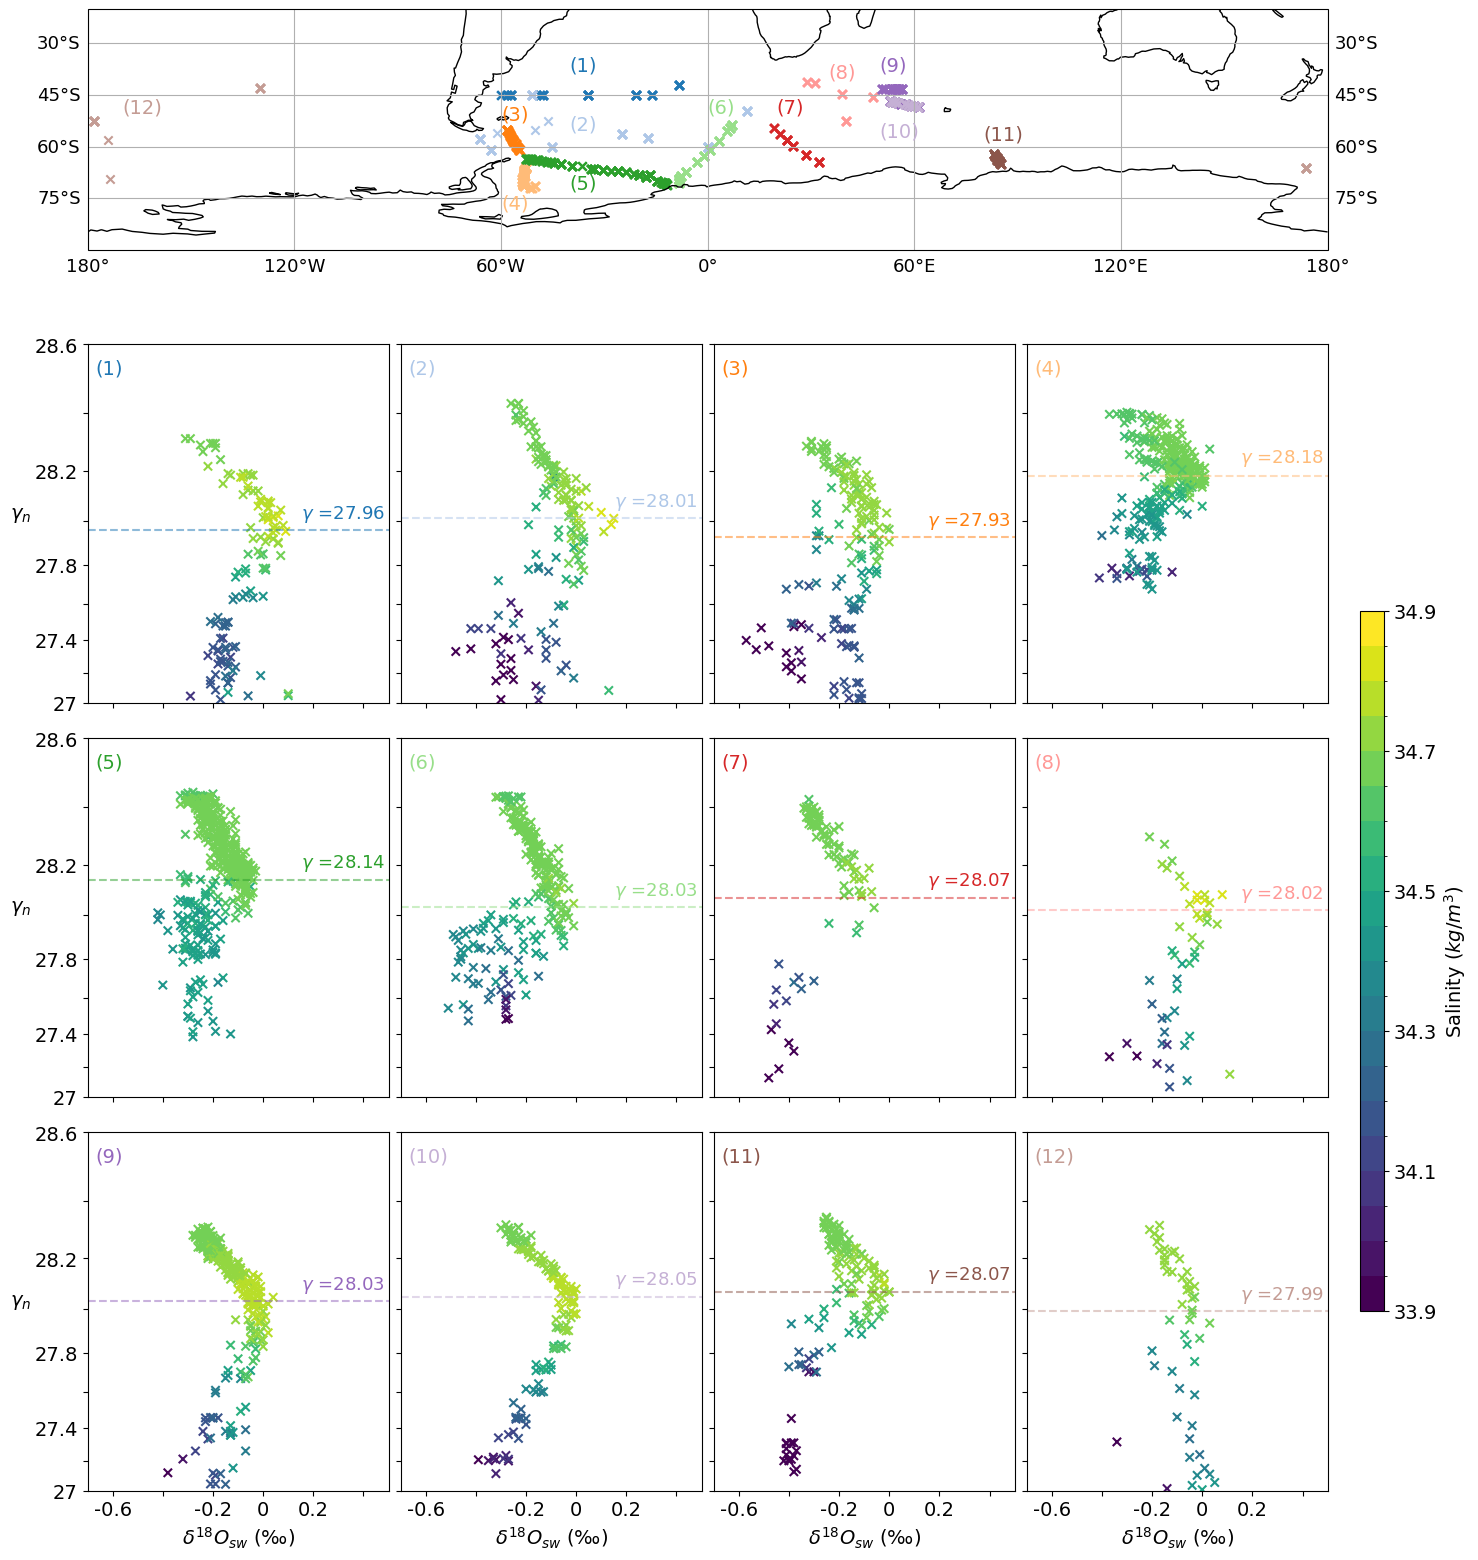

In [11]:
fig = plt.figure(figsize = (16, 20)); gs = fig.add_gridspec(4, 4, wspace = 0.04, hspace = 0.1); font = 14

ax = fig.add_subplot(gs[0, :], projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m'); gl = ax.gridlines(draw_labels = {'bottom': 'x', 'right': 'y', 'left': 'y'}, ylocs = [-90 + 15 * i for i in range(5)])
gl.xlabel_style = {'size': font - 1}; gl.ylabel_style = {'size': font - 1}; ax.set_ylim(-90, -20); ax.set_xlim(-180, 180); couleurs = plt.cm.tab20(range(12))
for i in range(12):
    ax.scatter(dfs[i]['Longitude'], dfs[i]['Latitude'], color = couleurs[i], marker = 'x')
    ax.text(uf.coords_dataset[i][0], uf.coords_dataset[i][1], '(' + str(i+1) + ')', fontsize = font, color = couleurs[i])


norm_S = uf.get_BoundNorm(33.9, 34.9, nbins = 20)
for i in range(12):
    i_row, i_col = i//4 + 1, i%4; xlabels, ylabels = uf.get_xylabels(3, 4, i)

    ax = fig.add_subplot(gs[i_row, i_col])
    sc = ax.scatter(dfs[i]['d18O'], dfs[i]['Gamma'], marker = 'x', c = dfs[i]['Salinity'], norm = norm_S)
    
    ax.axhline(y = uf.l_neut_dens[i], ls = '--', color = couleurs[i], alpha = 0.5); ax.text(0.15, uf.l_neut_dens[i] + 0.05, '$\gamma$ =' + str(uf.l_neut_dens[i]), fontsize = font - 1, color = couleurs[i])
    ax.text(-0.67, 28.52, '(' + str(i + 1) + ')', fontsize = font, color = couleurs[i])
    
    ax.set_yscale('custom_scale'); ax.invert_yaxis()
    uf.plot_details_axis(ax, sc, cb = False, xlim = (-0.7, 0.5), ylim = (28.6, 27), nbins = 20, xticks = [-0.6 + 0.2*i for i in range(6)], yticks = [27 + 0.2*i for i in range(9)], font = font, xlabels = xlabels, ylabels = ylabels)
    
    if ylabels: ax.set_ylabel('$\gamma_n$', fontsize = font, rotation = 0, labelpad = 10); ax.set_yticklabels(['27', '', '27.4', '', '27.8', '', '28.2', '', '28.6'], fontsize = font)
    if xlabels: ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font); ax.set_xticklabels([-0.6, '', -0.2, 0, 0.2, ''], fontsize = font)
    
uf.add_cbar(fig, sc, y = 0.2, height = 0.35, fontsize = font, label = 'Salinity ($kg/m^3$)', ticks = [33.9 + i * 0.2 for i in range (6)])

plt.savefig(fig_path + 'd18o_profiles_SO_map.png', bbox_inches = 'tight')

## Plot the GISS d18o SO comp selected for the optimization

In [12]:
aux2 = aux.where(aux['Depth']>= 150).dropna()
dfs2 = uf.create_dfs(aux2)

<>:18: SyntaxWarning: invalid escape sequence '\g'
<>:24: SyntaxWarning: invalid escape sequence '\g'
<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\g'
<>:24: SyntaxWarning: invalid escape sequence '\g'
<>:25: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_10568\4140397650.py:18: SyntaxWarning: invalid escape sequence '\g'
  ax.axhline(y = uf.l_neut_dens[i], ls = '--', color = couleurs[i], alpha = 0.5); ax.text(0.15, uf.l_neut_dens[i] + 0.05, '$\gamma$ =' + str(uf.l_neut_dens[i]), fontsize = font - 1, color = couleurs[i])
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_10568\4140397650.py:24: SyntaxWarning: invalid escape sequence '\g'
  if ylabels: ax.set_ylabel('$\gamma_n$', fontsize = font, rotation = 0, labelpad = 10); ax.set_yticklabels(['27', '', '27.4', '', '27.8', '', '28.2', '', '28.6'], fontsize = font)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_10568\4140397650.py:25: SyntaxWar

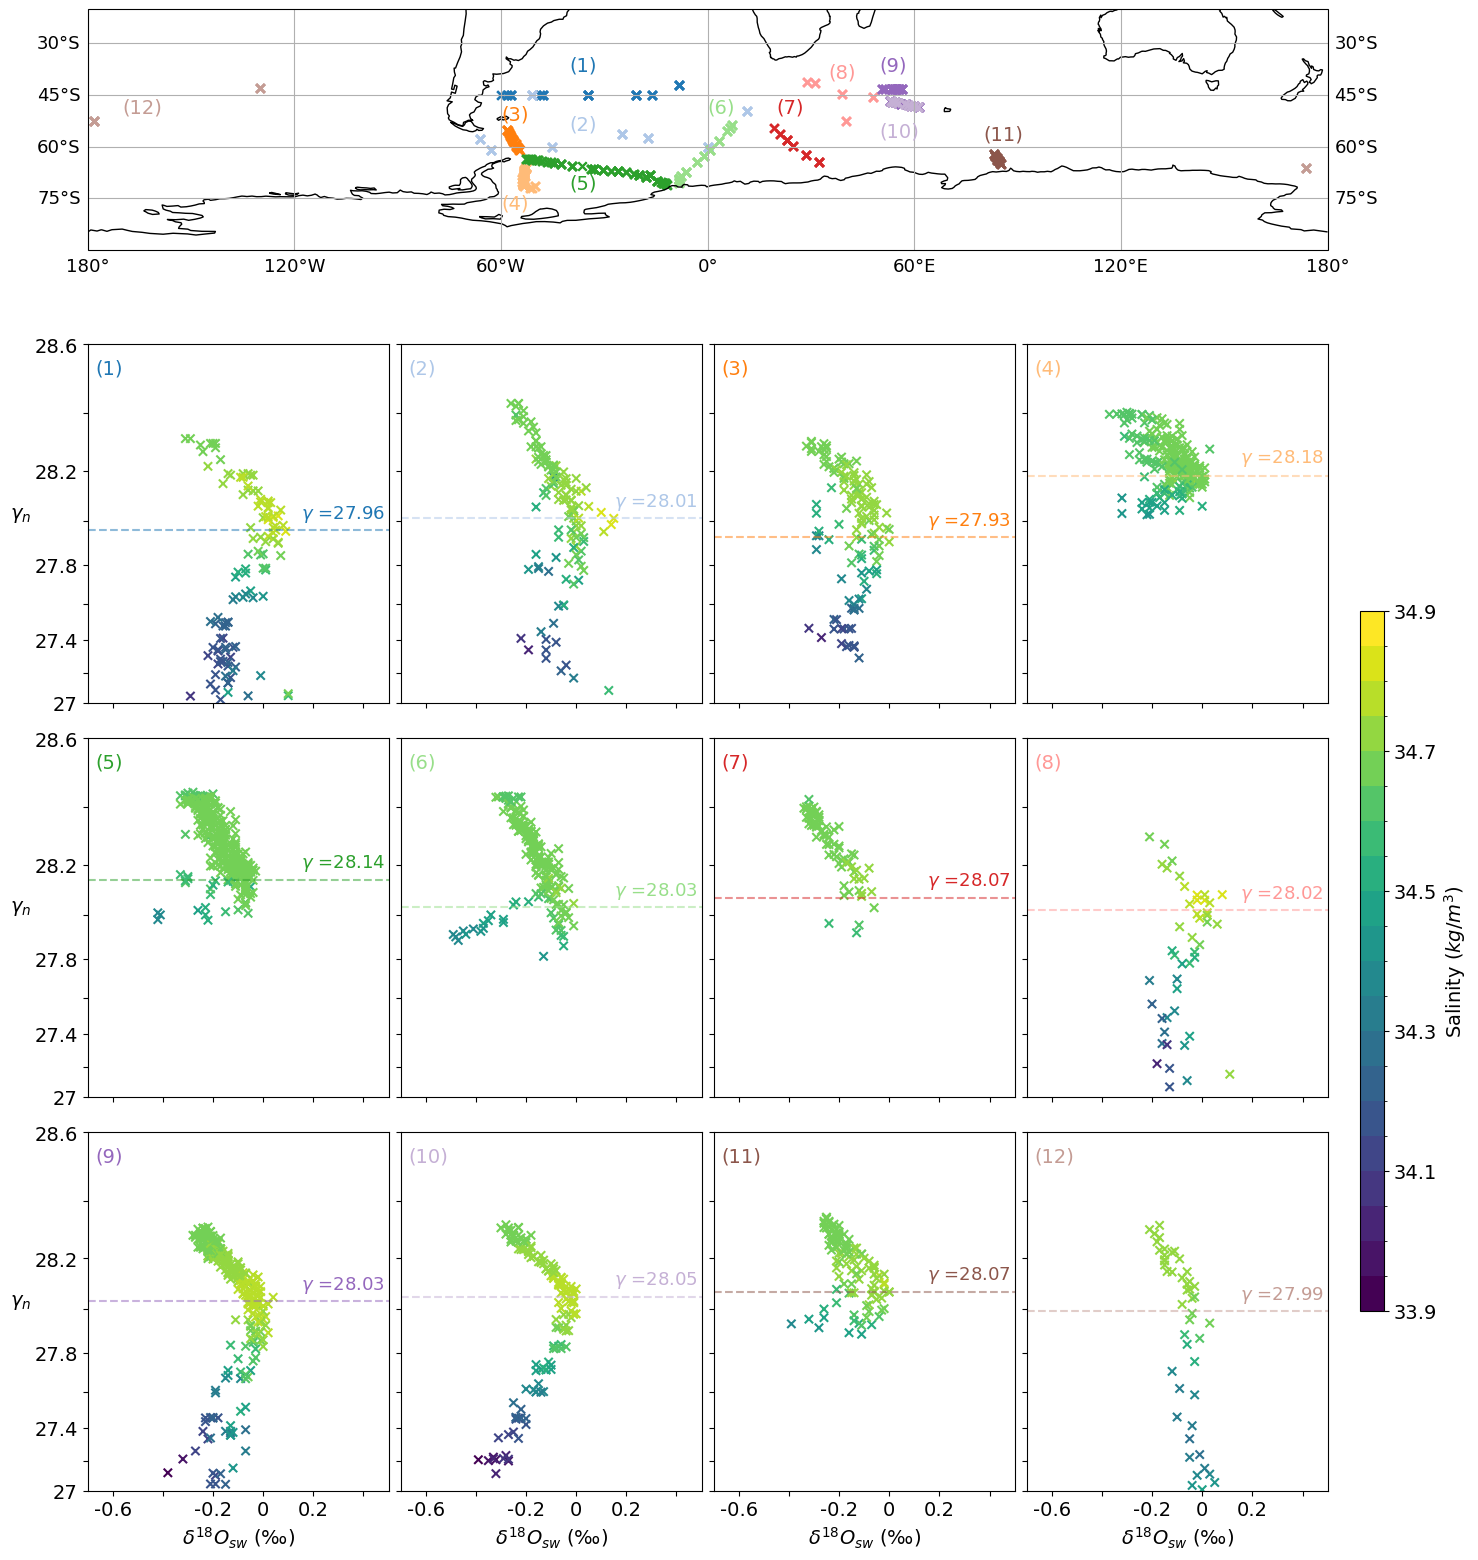

In [13]:
fig = plt.figure(figsize = (16, 20)); gs = fig.add_gridspec(4, 4, wspace = 0.04, hspace = 0.1); font = 14

ax = fig.add_subplot(gs[0, :], projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m'); gl = ax.gridlines(draw_labels = {'bottom': 'x', 'right': 'y', 'left': 'y'}, ylocs = [-90 + 15 * i for i in range(5)])
gl.xlabel_style = {'size': font - 1}; gl.ylabel_style = {'size': font - 1}; ax.set_ylim(-90, -20); ax.set_xlim(-180, 180); couleurs = plt.cm.tab20(range(12))
for i in range(12):
    ax.scatter(dfs2[i]['Longitude'], dfs2[i]['Latitude'], color = couleurs[i], marker = 'x')
    ax.text(uf.coords_dataset[i][0], uf.coords_dataset[i][1], '(' + str(i+1) + ')', fontsize = font, color = couleurs[i])


norm_S = uf.get_BoundNorm(33.9, 34.9, nbins = 20)
for i in range(12):
    i_row, i_col = i//4 + 1, i%4; xlabels, ylabels = uf.get_xylabels(3, 4, i)

    ax = fig.add_subplot(gs[i_row, i_col])
    sc = ax.scatter(dfs2[i]['d18O'], dfs2[i]['Gamma'], marker = 'x', c = dfs2[i]['Salinity'], norm = norm_S)
    
    ax.axhline(y = uf.l_neut_dens[i], ls = '--', color = couleurs[i], alpha = 0.5); ax.text(0.15, uf.l_neut_dens[i] + 0.05, '$\gamma$ =' + str(uf.l_neut_dens[i]), fontsize = font - 1, color = couleurs[i])
    ax.text(-0.67, 28.52, '(' + str(i + 1) + ')', fontsize = font, color = couleurs[i])
    
    ax.set_yscale('custom_scale'); ax.invert_yaxis()
    uf.plot_details_axis(ax, sc, cb = False, xlim = (-0.7, 0.5), ylim = (28.6, 27), nbins = 20, xticks = [-0.6 + 0.2*i for i in range(6)], yticks = [27 + 0.2*i for i in range(9)], font = font, xlabels = xlabels, ylabels = ylabels)
    
    if ylabels: ax.set_ylabel('$\gamma_n$', fontsize = font, rotation = 0, labelpad = 10); ax.set_yticklabels(['27', '', '27.4', '', '27.8', '', '28.2', '', '28.6'], fontsize = font)
    if xlabels: ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font); ax.set_xticklabels([-0.6, '', -0.2, 0, 0.2, ''], fontsize = font)
    
uf.add_cbar(fig, sc, y = 0.2, height = 0.35, fontsize = font, label = 'Salinity ($kg/m^3$)', ticks = [33.9 + i * 0.2 for i in range (6)])

plt.savefig(fig_path + 'd18o_profiles_SO_map_optimization.png', bbox_inches = 'tight')

### Drake Passage

(-100.0, 20.0)

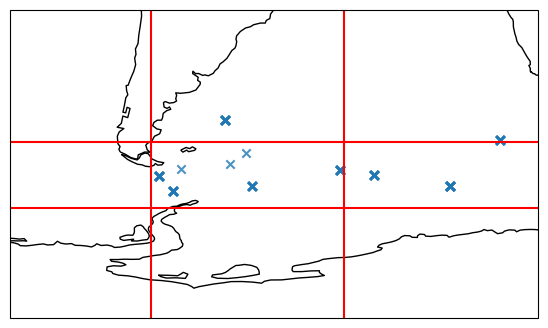

In [14]:
lon_min, lon_max = -68, -24; lat_min, lat_max = -65, -50

fig=plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines(resolution='110m')
ax.axhline(y = lat_min, color = 'red'); ax.axhline(y = lat_max, color = 'red'); ax.axvline(x = lon_min, color ='red'); ax.axvline(x = lon_max, color ='red')
sc = ax.scatter(dfs[1]['Longitude'], dfs[1]['Latitude'], marker = 'x', alpha = 0.8)
ax.set_ylim(-90, -20); ax.set_xlim(-100, 20)

In [15]:
df_DP = dfs[1].where((dfs[1]['Longitude'] >= 360 + lon_min) & (dfs[1]['Longitude'] <= 360 + lon_max) & (dfs[1]['Latitude'] >= lat_min) & (dfs[1]['Latitude'] <= lat_max)).dropna(how = 'all')
df_Atl = dfs[1].where((dfs[1]['Longitude'] < 360 + lon_min) | (dfs[1]['Longitude'] > 360 + lon_max) | (dfs[1]['Latitude'] < lat_min) | (dfs[1]['Latitude'] > lat_max)).dropna(how = 'all')

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\g'
<>:18: SyntaxWarning: invalid escape sequence '\g'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\g'
<>:31: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\g'
<>:18: SyntaxWarning: invalid escape sequence '\g'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\g'
<>:31: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_10568\4082965784.py:7: SyntaxWarning: inv

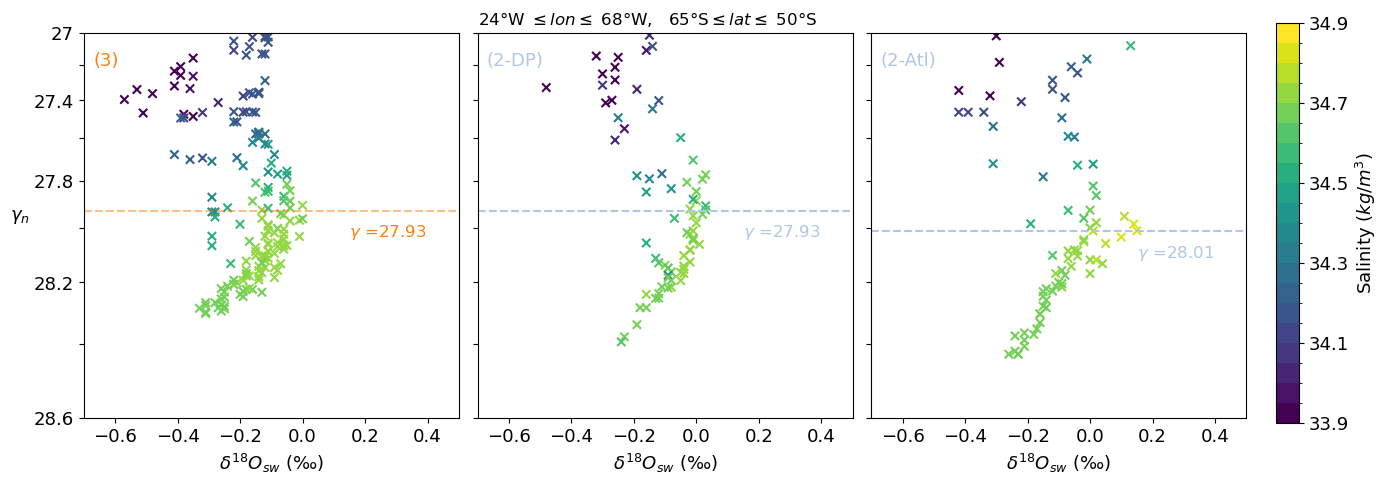

In [16]:
fig = plt.figure(figsize = (15, 5)); gs = fig.add_gridspec(1, 3, wspace = 0.05)
font = 13

ax = fig.add_subplot(gs[0, 0])
gamma = 27.93
sc = ax.scatter(dfs[2]['d18O'], dfs[2]['Gamma'], marker = 'x', c = dfs[2]['Salinity'], norm = norm_S)
ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font); ax.set_ylabel('$\gamma_n$', fontsize = font, rotation = 0, labelpad = 10)
ax.axhline(y = gamma, ls = '--', color = couleurs[2], alpha = 0.5); ax.text(0.15,gamma + 0.1, '$\gamma$ =' + str(gamma), fontsize = font - 1, color = couleurs[2])
ax.text(-0.67, 27.2, '(3)', fontsize = font, color = couleurs[2])
uf.plot_details_axis(ax, sc, cb = False, xlim = (-0.7, 0.5), ylim = (28.6, 27), nbins = 20, xticks = [-0.6 + 0.2*i for i in range(6)], yticks = [27 + 0.2*i for i in range(9)], font = font)
ax.set_yscale('custom_scale')
ax.invert_yaxis()
ax.set_yticklabels(['27', '', '27.4', '', '27.8', '', '28.2', '', '28.6'], fontsize = font)
    
ax = fig.add_subplot(gs[0, 1])
gamma = 27.93
sc = ax.scatter(df_DP['d18O'], df_DP['Gamma'], marker = 'x', c = df_DP['Salinity'], norm = norm_S)
ax.axhline(y = gamma, ls = '--', color = couleurs[1]); ax.text(0.15,gamma + 0.1, '$\gamma$ =' + str(gamma), fontsize = font - 1, color = couleurs[1])
ax.text(-0.67, 27.2, '(2-DP)', fontsize = font, color = couleurs[1])
ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font)
uf.plot_details_axis(ax, sc, cb = False, xlim = (-0.7, 0.5), ylim = (28.6, 27), nbins = 20, xticks = [-0.6 + 0.2*i for i in range(6)], yticks = [27 + 0.2*i for i in range(9)], font = font, ylabels = False)
ax.set_title('24°W $\leq lon \leq$ 68°W,   ' + '65°S$\leq lat \leq$ 50°S', fontsize = font - 1, loc = 'left')
ax.set_yscale('custom_scale')
ax.invert_yaxis()
ax.set_yticklabels([])
    
ax = fig.add_subplot(gs[0, 2])
gamma = 28.01
sc = ax.scatter(df_Atl['d18O'], df_Atl['Gamma'], marker = 'x', c = df_Atl['Salinity'], norm = norm_S)
ax.axhline(y = gamma, ls = '--', color = couleurs[1]); ax.text(0.15,gamma + 0.1, '$\gamma$ =' + str(gamma), fontsize = font - 1, color = couleurs[1])
ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font)
ax.text(-0.67, 27.2, '(2-Atl)', fontsize = font, color = couleurs[1])
uf.plot_details_axis(ax, sc, cb = False, xlim = (-0.7, 0.5), ylim = (28.6, 27), nbins = 20, xticks = [-0.6 + 0.2*i for i in range(6)], yticks = [27 + 0.2*i for i in range(9)], font = font, ylabels = False)
ax.set_yscale('custom_scale')
ax.invert_yaxis()
ax.set_yticklabels([])
    
uf.add_cbar(fig, sc, fontsize = font, label = 'Salinity ($kg/m^3$)', ticks = [33.9 + i * 0.2 for i in range (6)])


plt.savefig(fig_path + 'd18o_profiles_DP_map.png', bbox_inches = 'tight')

# Optimization

In [15]:
from tracer_optimization import TracerOptimizer

## Optimizing d18o

In [16]:
optimizer = TracerOptimizer(data_path)

In [ ]:
# Replicate the d18O optimization using the module
d18o_initial_values = np.array([0.45, -0.3, -0.35, -0.2, 0.3, -0.4])

# Set up the same bounds as used above
lower_bounds = np.full(6, -1.0); upper_bounds = np.full(6, 1.0)
lower_bounds[0] = 0.4499; upper_bounds[0] = 0.4501  # dyeLL fixed
lower_bounds[2] = -0.3501; upper_bounds[2] = -0.3499  # dyeNP fixed
d18o_bounds = (lower_bounds, upper_bounds)

# Run the complete optimization workflow
d18o_results_module = optimizer.run_complete_optimization(
    tracer_file='giss_d18o.txt',
    tracer_column='d18O',
    initial_values=d18o_initial_values,
    bounds=d18o_bounds,
    min_depth=150.0,
    gamma_range=(27.0, 28.6),
    latitude_threshold=-40.0
)

Running complete optimization workflow for d18O...
Loading model data...
Setting up interpolators...
Preparing tracer data from giss_d18o.txt...
Tracer data prepared. Final dataset contains 2347 observations.
Starting optimization for d18O...
Setting up interpolators...
Preparing tracer data from giss_d18o.txt...
Tracer data prepared. Final dataset contains 2347 observations.
Starting optimization for d18O...
Optimization complete.
Calculating statistics for d18O...
Reconstructing d18O values...
Optimization complete.
Calculating statistics for d18O...
Reconstructing d18O values...


In [10]:
d18o_EM_values = d18o_results_module['optimization_results']
d18o_EM_values_TMI = np.array([result.x[:6] if result is not None else np.full(6, np.nan) for result in d18o_EM_values['TMI']]).T
d18o_EM_values_ocim = np.array([result.x[:6] if result is not None else np.full(6, np.nan) for result in d18o_EM_values['OCIM']]).T  
d18o_EM_values_nemo = np.array([result.x[:6] if result is not None else np.full(6, np.nan) for result in d18o_EM_values['NEMO']]).T

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_15988\2262998926.py:12: SyntaxWarning: invalid escape sequence '\d'
  if j == 0: ax.set_ylabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_15988\2262998926.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


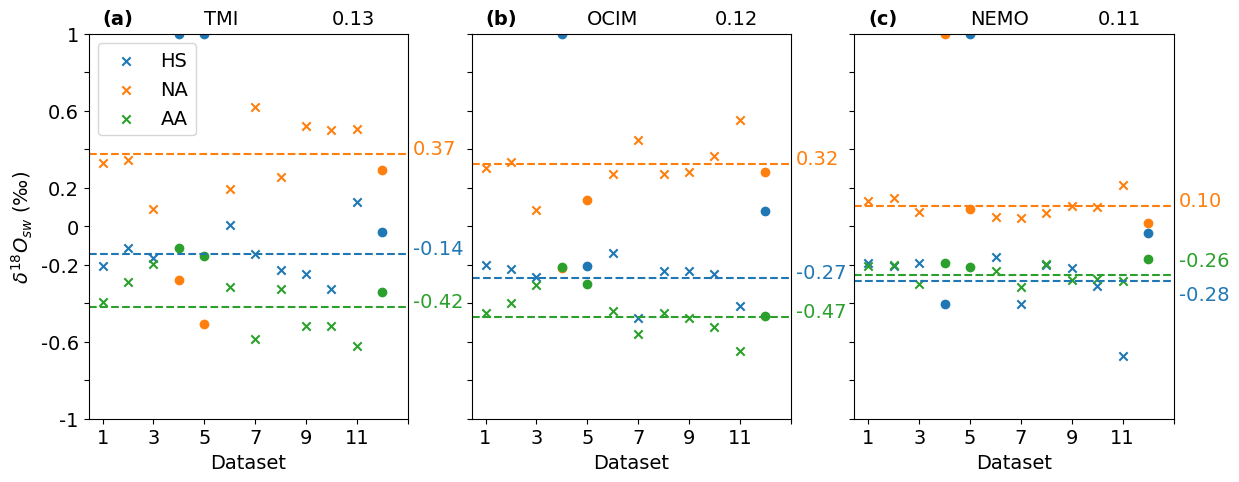

In [11]:
# Create the detailed end-member plot with exclusions and statistics (TracerOptimizer version)
fig = plt.figure(figsize = (14, 5)); gs = fig.add_gridspec(1, 3, hspace = 0.12); font = 14
module_EM_values = [d18o_EM_values_TMI, d18o_EM_values_ocim, d18o_EM_values_nemo]
models = uf.models; suffixes = ['_TMI', '_ocim', '_nemo']; dyes_TMI = uf.dyes_TMI
prop_cycle = plt.rcParams['axes.prop_cycle']; colors = prop_cycle.by_key()['color']

# Get the full tracer dataset (not just the optimization datasets)
full_tracer_data = d18o_results_module.get('tracer_data')

for j in range(3):
    ax = fig.add_subplot(gs[0, j]); ax.text(0, 1.05, uf.panels_letter_parenthesis[j], fontsize = font, fontweight = 'bold')
    if j == 0: ax.set_ylabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font)
    idx_to_exclude = optimizer.exclusion_indices[models[j]]['dyeHS']; idx = [k for k in range(12)]
    
    rmse_value = uf.rmse_model_recons(full_tracer_data, 'd18O', models[j], optimizer.mean_end_members)
    
    for i in [3, 4, 5]:
        ax.scatter(np.delete(idx, idx_to_exclude, 0), np.delete(module_EM_values[j][i, :], idx_to_exclude, 0), label = uf.dyes[i].replace('Dye', ''), marker = 'x', c = colors[i - 3])
        ax.scatter(idx_to_exclude, module_EM_values[j][i, idx_to_exclude], marker = 'o', c = colors[i - 3])
        
        ax.axhline(y = np.nanmean(np.delete(module_EM_values[j][i, :], idx_to_exclude, 0)), c = colors[i - 3], ls = '--')
        em_d18o_value = optimizer.mean_end_members['d18O'][models[j]][dyes_TMI[i]]
        if (j == 2) & (i == 5): ax.text(12.2, em_d18o_value + 0.05, format(em_d18o_value, '.2f'), c = colors[i - 3], fontsize = font)
        elif (j == 2) & (i == 3): ax.text(12.2, em_d18o_value - 0.1, format(em_d18o_value, '.2f'), c = colors[i - 3], fontsize = font)
        else: ax.text(12.2, em_d18o_value, format(em_d18o_value, '.2f'), c = colors[i - 3], fontsize = font)
        
    ax.set_ylim(-1, 1); ax.text(4, 1.05, models[j], fontsize = font); ax.set_xticks([k*2 for k in range(7)]); ax.set_xticklabels([str(k*2 + 1) for k in range(6)] + [''], fontsize = font); ax.set_xlabel('Dataset', fontsize = font)
    ax.set_yticks([-1 + 0.2 * k for k in range(11)]); ax.set_yticklabels([])
    if j ==0: ax.set_yticklabels([-1, '', -0.6, '', -0.2, 0, 0.2, '', 0.6, '', 1], fontsize = font); ax.legend(fontsize = font)
        
    # rmse_value = np.sqrt(np.mean((np.array(all_obs) - np.array(all_recon))**2))
    ax.text(9, 1.05, format(rmse_value, '.2f'), fontsize = font)

plt.tight_layout()
# plt.savefig(fig_path + 'd18o_values_EM_12_datasets_3models.png', bbox_inches = 'tight')

## Optimizing Salinity

In [23]:
salinity_optimizer = TracerOptimizer(data_path)

# Define proper bounds for salinity optimization (PSU values typically 33.5-36.0)
salinity_lower_bounds = np.array([35.4999, 33.5, 33.4999, 33.5, 33.5, 33.5])
salinity_upper_bounds = np.array([35.5001, 35.5, 33.5001, 35.5, 35.5, 35.5])
salinity_bounds = (salinity_lower_bounds, salinity_upper_bounds)

tracer = 'absolute_salinity'

salinity_results = salinity_optimizer.run_complete_optimization(
    tracer_file='giss_d18o_SO_processed.csv',
    tracer_column=tracer,
    initial_values=np.array([35.5, 34.6, 33.5, 34.8, 34.7, 34.4]),  # Initial PSU values
    bounds=salinity_bounds,  # Add proper bounds
    min_depth=150.0,
    gamma_range=(27.0, 28.6),
    latitude_threshold=-40.0
)

salinity_EM_values = salinity_results['optimization_results']
salinity_EM_values_TMI = np.array([result.x[:6] if result is not None else np.full(6, np.nan) for result in salinity_EM_values['TMI']]).T
salinity_EM_values_ocim = np.array([result.x[:6] if result is not None else np.full(6, np.nan) for result in salinity_EM_values['OCIM']]).T  
salinity_EM_values_nemo = np.array([result.x[:6] if result is not None else np.full(6, np.nan) for result in salinity_EM_values['NEMO']]).T

Running complete optimization workflow for absolute_salinity...
Loading model data...
Setting up interpolators...
Preparing tracer data from giss_d18o_SO_processed.csv...
Tracer data prepared. Final dataset contains 2347 observations.
Starting optimization for absolute_salinity...
Optimization complete.
Calculating statistics for absolute_salinity...
Reconstructing absolute_salinity values...
Setting up interpolators...
Preparing tracer data from giss_d18o_SO_processed.csv...
Tracer data prepared. Final dataset contains 2347 observations.
Starting optimization for absolute_salinity...
Optimization complete.
Calculating statistics for absolute_salinity...
Reconstructing absolute_salinity values...


In [30]:
# Extract the calculated statistics
salinity_mean_EM = np.empty((3, 6)); salinity_std_EM = np.empty((3, 6))
models = uf.models; dyes_TMI = uf.dyes_TMI

for i, model in enumerate(models):
    salinity_mean_EM[i] = list(salinity_optimizer.mean_end_members[tracer][model].values())
    salinity_std_EM[i] = list(salinity_optimizer.std_end_members[tracer][model].values())

salinity_EM_plot_values = [salinity_EM_values_TMI, salinity_EM_values_ocim, salinity_EM_values_nemo]

C:\Users\bm25v947\AppData\Local\Temp\ipykernel_13764\1382840685.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


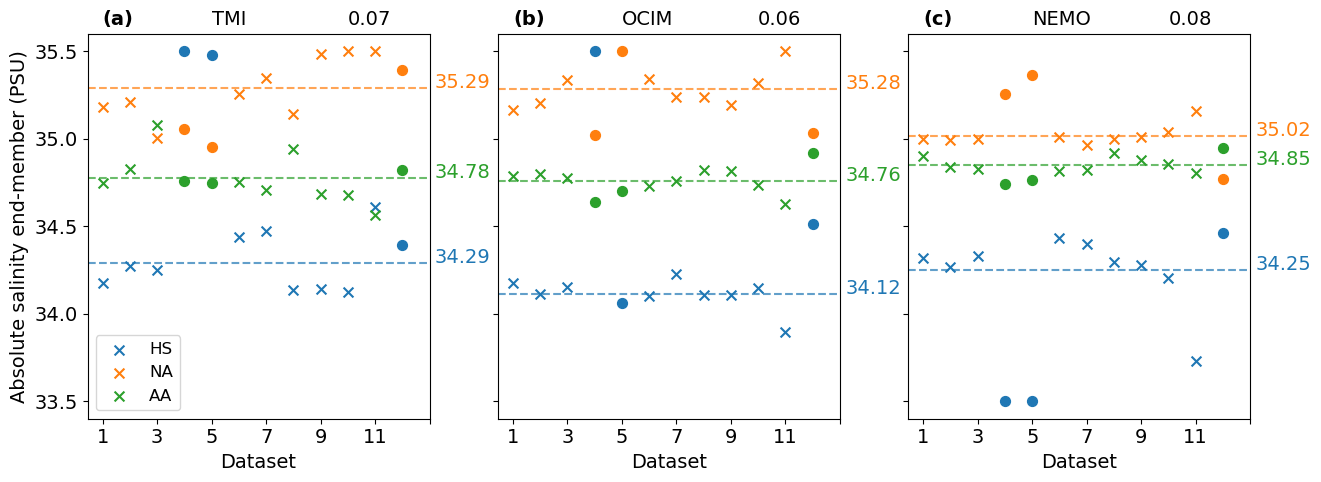

In [ ]:
fig = plt.figure(figsize=(15, 5)); gs = fig.add_gridspec(1, 3, hspace=0.12)
models = ['TMI', 'OCIM', 'NEMO']; suffixes = ['_TMI', '_ocim', '_nemo']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']; font = 14

full_tracer_data = salinity_results.get('tracer_data')

for j in range(3):
    ax = fig.add_subplot(gs[0, j]); ax.text(0, 35.65, uf.panels_letter_parenthesis[j], fontsize = font, fontweight = 'bold')
    ax.text(4, 35.65, models[j], fontsize=font)
    
    idx_to_exclude = salinity_optimizer.exclusion_indices[models[j]]['dyeHS']; idx = [k for k in range(12)]
    rmse_value = uf.rmse_model_recons(full_tracer_data, tracer, models[j], salinity_optimizer.mean_end_members)
    ax.text(9, 35.65, format(rmse_value, '.2f'), fontsize=font)
    
    for i in [3, 4, 5]:
        ax.scatter(np.delete(idx, idx_to_exclude, 0), np.delete(salinity_EM_plot_values[j][i, :], idx_to_exclude, 0), label=uf.dyes[i].replace('Dye', ''), marker='x', c=colors[i-3], s=50)
        ax.scatter(idx_to_exclude, salinity_EM_plot_values[j][i, idx_to_exclude], marker='o', c=colors[i-3], s=50)
        
        mean_val = np.nanmean(np.delete(salinity_EM_plot_values[j][i, :], idx_to_exclude, 0))
        ax.axhline(y=mean_val, c=colors[i-3], ls='--', alpha=0.7)

        em_S_value = salinity_optimizer.mean_end_members[tracer][models[j]][dyes_TMI[i]]
        ax.text(12.2, em_S_value, format(em_S_value, '.2f'), c = colors[i - 3], fontsize = font)

    ax.set_ylim(33.4, 35.6); ax.set_yticks([33.5, 34.0, 34.5, 35.0, 35.5])
    ax.set_xticks([i*2 for i in range(7)]); ax.set_xticklabels([str(i*2 + 1) for i in range(6)] + [''], fontsize=font); ax.set_xlabel('Dataset', fontsize=font)
    
    if j == 0:
        ax.set_ylabel('Salinity end-member (PSU)', fontsize=font)
        ax.set_yticklabels([33.5, 34.0, 34.5, 35.0, 35.5], fontsize=font)
        ax.legend(fontsize=font-2)
    else:
        ax.set_yticklabels([])

plt.tight_layout()
# plt.savefig(fig_path + 'absolute_salinity_values_EM_12_datasets_3models.png', bbox_inches='tight')

## End-member d18o-S diagram

In [15]:
from matplotlib.lines import Line2D
from matplotlib.patches import Ellipse

In [29]:
mask_md, mask_d = (dsClim['basin_masks'] == 14) & (dsClim['depth'] >= 2000) & (dsClim['depth'] <= 3000), (dsClim['basin_masks'] == 14) & (dsClim['depth'] >= 3000) 
salinity_md, d18o_md = np.nanmean(dsClim['absolute_salinity'].where(mask_md)), np.nanmean(dsClim['seawater_d18O'].where(mask_md))
salinity_d, d18o_d = np.nanmean(dsClim['absolute_salinity'].where(mask_d)), np.nanmean(dsClim['seawater_d18O'].where(mask_d))

In [30]:
salinity_md, d18o_md

(np.float64(34.64133623834119), np.float64(-0.030316375745073898))

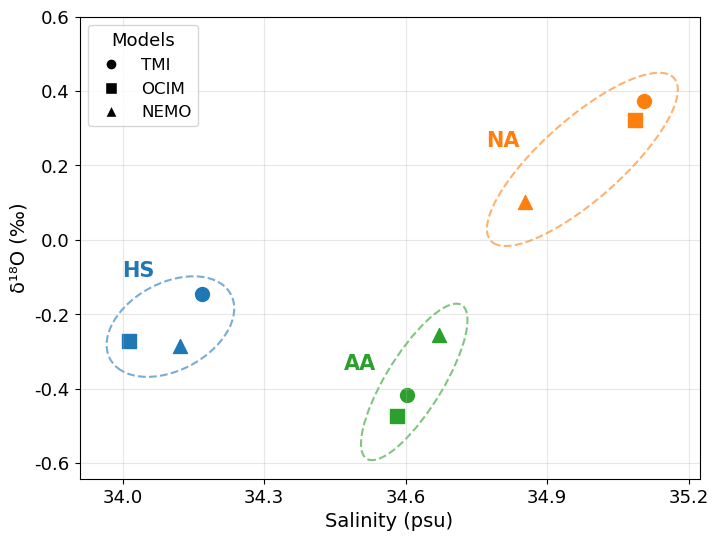

In [35]:
fig = plt.figure(figsize=(8, 6)); font = 14; ax = plt.gca()
markers = ['o', 's', '^']
angles_ellipses = [-45, -40, -25]; ratio_width = [2/3, 1/3, 2/3]
offset_center = [(0, 0), (0.04, 0.05), (0, 0)]

for imodel, model in enumerate(models):
    for i in range(3):
        ax.scatter(salinity_optimizer.mean_end_members['Salinity'][model][dyes_TMI[i+3]], optimizer.mean_end_members['d18O'][model][dyes_TMI[i+3]], marker=markers[imodel], s=100, color = colors[i])
for i in [3, 4, 5]:    
    # Add ellipse around valid data points
    valid_s = [values[dyes_TMI[i]] for values in salinity_optimizer.mean_end_members['Salinity'].values()]
    valid_d18o = [values[dyes_TMI[i]] for values in optimizer.mean_end_members['d18O'].values()]
    
    center_x = np.mean(valid_s); center_y = np.mean(valid_d18o)
    width = 5 * np.std(valid_s)*ratio_width[i-3]; height = 5 * np.std(valid_d18o)
    
    ellipse = Ellipse(xy=(center_x - offset_center[i-3][0], center_y - offset_center[i-3][1]), width=width, height=height, facecolor='none', edgecolor=colors[i-3], 
                    alpha=0.6, linewidth=1.5, linestyle='--', angle=angles_ellipses[i-3])

    ax.add_patch(ellipse)

# Create legend for water masses (symbols)
water_mass_legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor=colors[0], markersize=8, label='HS'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor=colors[1], markersize=8, label='NA'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor=colors[2], markersize=8, label='AA')
]

# Create legend for models (colors)
model_legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='TMI'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='black', markersize=8, label='OCIM'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='black', markersize=8, label='NEMO')
]

# legend1 = ax.legend(handles=water_mass_legend_elements, loc='upper left', title='Water Masses', fontsize=font-2, title_fontsize=font-1)
legend2 = ax.legend(handles=model_legend_elements, loc='upper left', title='Models', fontsize=font-2, title_fontsize=font-1)
# ax.add_artist(legend1)

# ax.scatter(salinity_md, d18o_md, marker='x', color = 'black')
# ax.scatter(salinity_d, d18o_d, marker='o', color = 'black')

ax.text(34, -0.1, 'HS', fontsize=font+1, color=colors[0], fontweight='bold')
ax.text(34.77, 0.25, 'NA', fontsize=font+1, color=colors[1], fontweight='bold')
ax.text(34.47, -0.35, 'AA', fontsize=font+1, color=colors[2], fontweight='bold')

ax.set_xlabel('Salinity (psu)', fontsize=font); ax.set_ylabel('δ¹⁸O (‰)', fontsize=font)
ax.set_xticks([34 + 0.3*i for i in range(5)]); ax.set_yticks([-0.6 + 0.2*i for i in range(7)])
ax.set_xticklabels([format(34 + 0.3*i, '.1f') for i in range(5)], fontsize=font-1); ax.set_yticklabels([format(-0.6 + 0.2*i, '.1f') for i in range(7)], fontsize=font-1)
ax.grid(True, alpha=0.3)

# plt.savefig(fig_path + 'salinity_d18o_endmembers.png', bbox_inches='tight')

## Reconstruct each dataset from its d18o EM found

### Individual dataset

In [26]:
model = 'OCIM' # 'NEMO', 'TMI' or 'OCIM'

<>:26: SyntaxWarning: invalid escape sequence '\g'
<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\g'
<>:31: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\g'
<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\g'
<>:31: SyntaxWarning: invalid escape sequence '\D'
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_10568\2825447420.py:26: SyntaxWarning: invalid escape sequence '\g'
  ax.axhline(y = uf.l_neut_dens[i], ls = '--', color = couleurs[i], alpha = 0.5); ax.text(0.15, uf.l_neut_dens[i] + 0.1, '$\gamma$ =' + str(uf.l_neut_dens[i]), fontsize = font - 1, color = couleurs[i])
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_10568\2825447420.py:28: SyntaxWarning: invalid escape sequence '\d'
  if xlabels: ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font)
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_10568\2825447420.py:29: SyntaxWarning: in

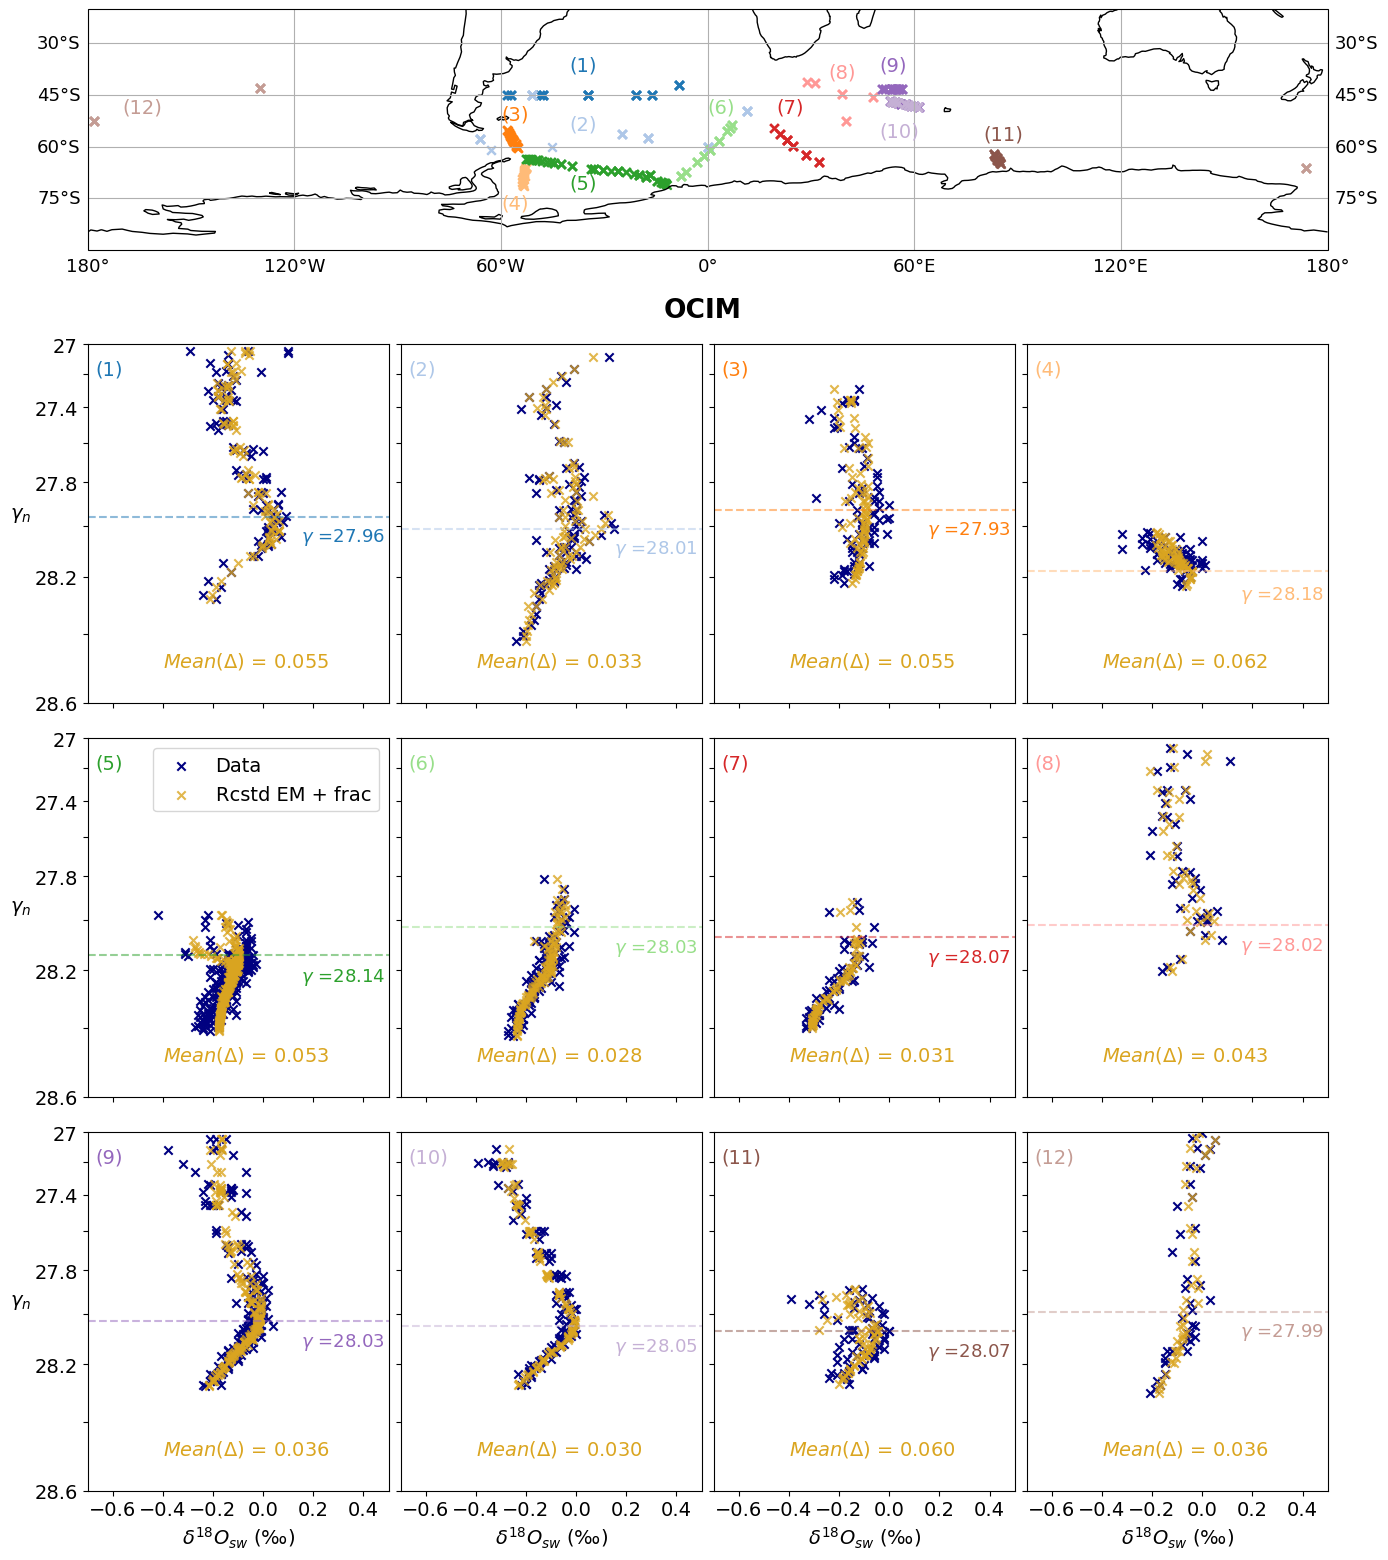

In [27]:
fig = plt.figure(figsize = (16, 20)); gs = fig.add_gridspec(4, 4, wspace = 0.04, hspace = 0.1); font = 14

ax = fig.add_subplot(gs[0, :], projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
gl = ax.gridlines(draw_labels = {'bottom': 'x', 'right': 'y', 'left': 'y'}, ylocs = [-90 + 15 * i for i in range(5)])
gl.xlabel_style = {'size': font - 1}; gl.ylabel_style = {'size': font - 1}
ax.set_ylim(-90, -20); ax.set_xlim(-180, 180)
couleurs = plt.cm.tab20(range(12))

for i in range(12):
    ax.scatter(d18o_results_module['datasets'][i]['Longitude'], d18o_results_module['datasets'][i]['Latitude'], color = couleurs[i], marker = 'x')
    ax.text(uf.coords_dataset[i][0], uf.coords_dataset[i][1], '(' + str(i+1) + ')', fontsize = font, color = couleurs[i])

norm_S = uf.get_BoundNorm(34, 35, nbins = 20)
for i in range(12):
    i_row, i_col = i//4 + 1, i%4; xlabels, ylabels = uf.get_xylabels(3, 4, i)
    
    if (i_row == 1) & (i_col==2): ax.text(0.35, 26.8, model, fontsize = font + 5, fontweight = 'bold')
        
    ax = fig.add_subplot(gs[i_row, i_col])
    sc = ax.scatter(d18o_results_module['datasets'][i]['d18O'], d18o_results_module['datasets'][i]['Gamma'], marker = 'x', c = 'navy', alpha = 1, label = 'Data') #, norm = norm_S)
    ax.scatter(d18o_results_module['datasets'][i]['d18O_rcst_' + model], d18o_results_module['datasets'][i]['Gamma'], marker = 'x', c = 'goldenrod', alpha = .8, label = 'Rcstd EM + frac')
# ax.scatter(dfs[i]['d18O_ocim_rcstd'], dfs[i]['Gamma'], marker = 'x', c = 'navy', alpha = 0.5)

    if i ==4: ax.legend(fontsize = font)
    ax.axhline(y = uf.l_neut_dens[i], ls = '--', color = couleurs[i], alpha = 0.5); ax.text(0.15, uf.l_neut_dens[i] + 0.1, '$\gamma$ =' + str(uf.l_neut_dens[i]), fontsize = font - 1, color = couleurs[i])
    
    if xlabels: ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font)
    if ylabels: ax.set_ylabel('$\gamma_n$', fontsize = font, rotation = 0, labelpad = 10)

    ax.text(-0.4, 28.5, '$Mean(\Delta)$ = ' + format(np.sqrt(np.nanmean((d18o_results_module['datasets'][i]['d18O'] - d18o_results_module['datasets'][i]['d18O_rcst_' + model])**2)), '.3f'), fontsize = font, color = 'goldenrod')
    ax.text(-0.67, 27.2, '(' + str(i + 1) + ')', fontsize = font, color = couleurs[i])
    
    ax.set_yscale('custom_scale')
    uf.plot_details_axis(ax, sc, cb = False, xlim = (-0.7, 0.5), ylim = (28.6, 27), nbins = 20, xticks = [-0.6 + 0.2*i for i in range(6)], yticks = [27 + 0.2*i for i in range(9)], font = font, xlabels = xlabels, ylabels = ylabels)
    ax.invert_yaxis()
    if ylabels: ax.set_yticklabels(['27', '', '27.4', '', '27.8', '', '28.2', '', '28.6'], fontsize = font)

# plt.savefig(fig_path + 'd18o_profiles_SO_map_' + model + '_rcs_dataset.png', bbox_inches = 'tight')

### With mean reconstruction

<>:25: SyntaxWarning: invalid escape sequence '\g'
<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:30: SyntaxWarning: invalid escape sequence '\D'
<>:31: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\g'
<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:30: SyntaxWarning: invalid escape sequence '\D'
<>:31: SyntaxWarning: invalid escape sequence '\D'
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_10568\128244964.py:25: SyntaxWarning: invalid escape sequence '\g'
  ax.axhline(y = uf.l_neut_dens[i], ls = '--', color = couleurs[i], alpha = 0.5); ax.text(0.15, uf.l_neut_dens[i] + 0.1, '$\gamma$ =' + str(uf.l_neut_dens[i]), fontsize = font - 1, color = couleurs[i])
C:\Users\bm25v947\AppData\Local\Temp\ipykernel_10568\128244964.py:27: SyntaxWarning: invalid escape sequence '\d'
  if xlabels: ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fonts

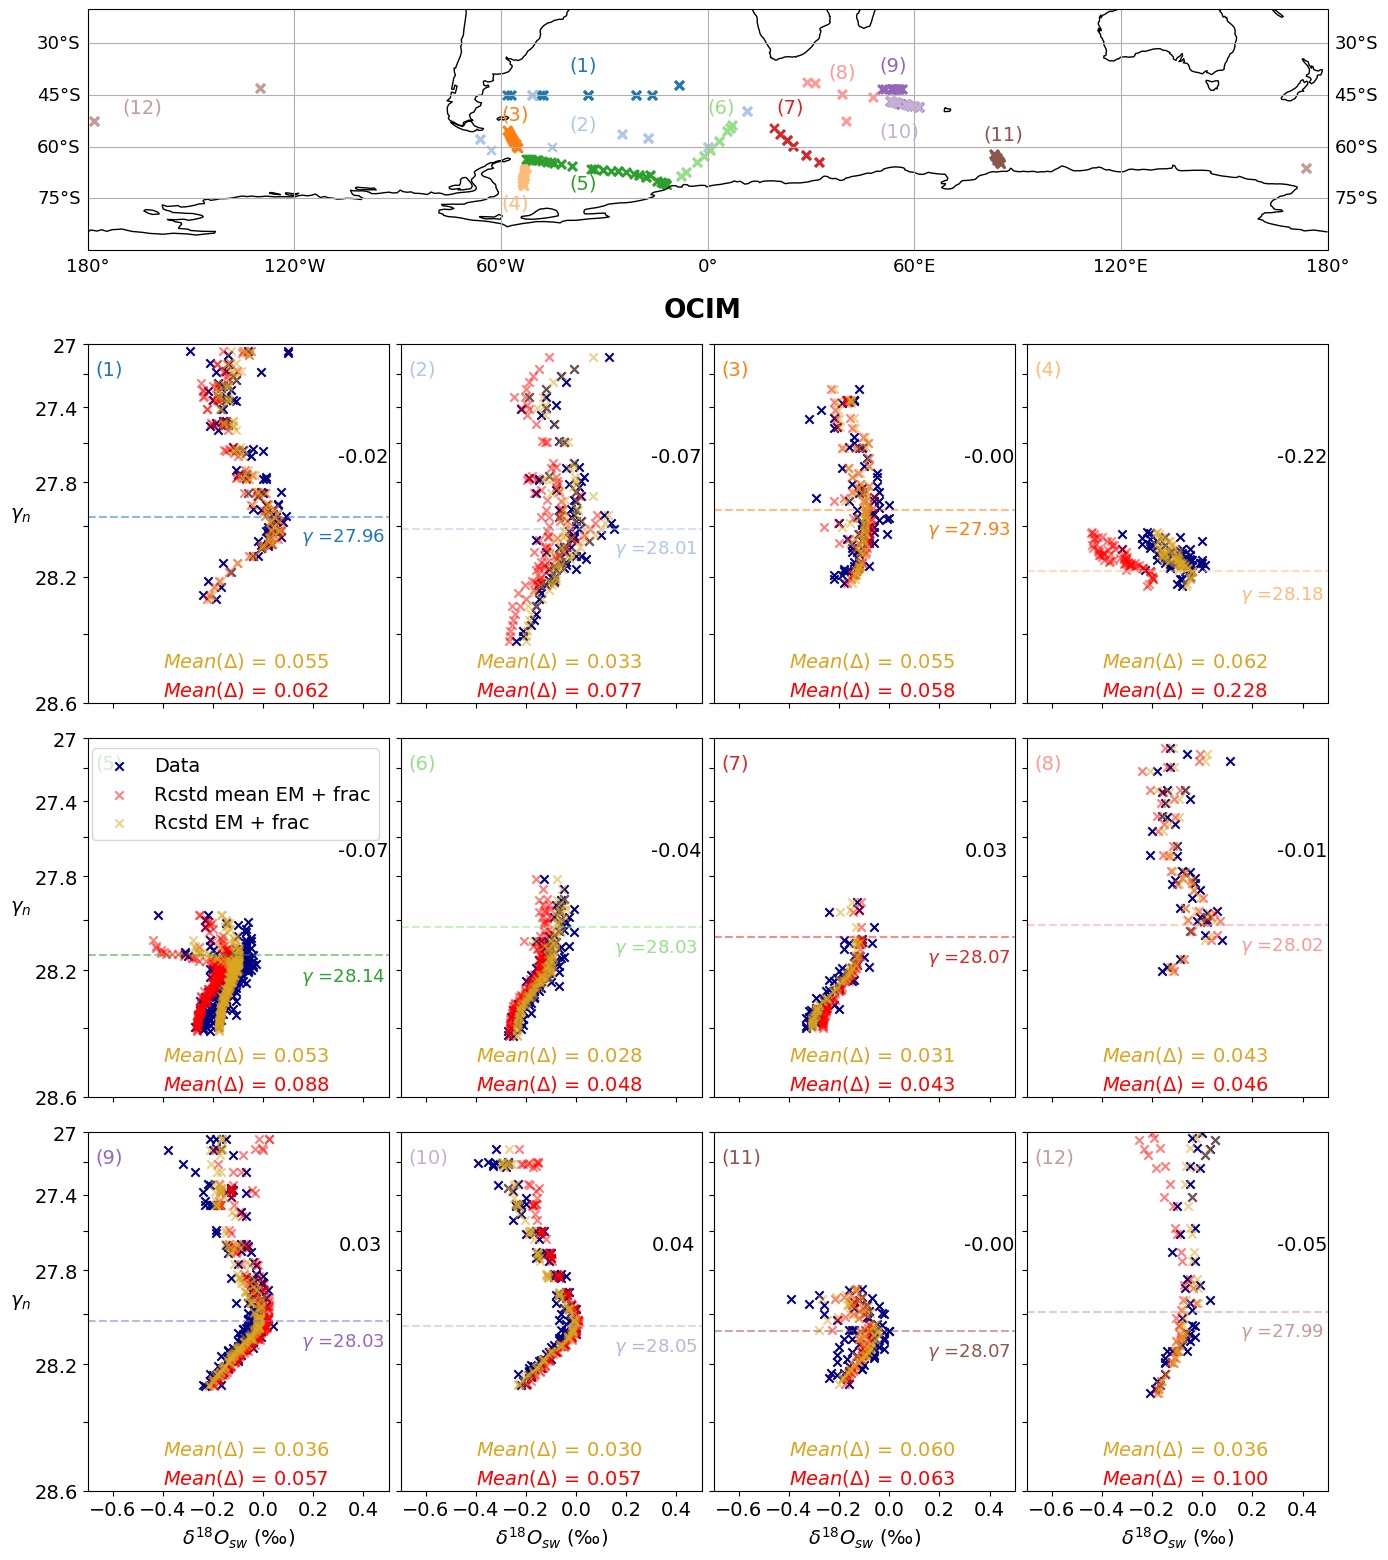

In [28]:
fig = plt.figure(figsize = (16, 20)); gs = fig.add_gridspec(4, 4, wspace = 0.04, hspace = 0.1); font = 14

ax = fig.add_subplot(gs[0, :], projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
gl = ax.gridlines(draw_labels = {'bottom': 'x', 'right': 'y', 'left': 'y'}, ylocs = [-90 + 15 * i for i in range(5)])
gl.xlabel_style = {'size': font - 1}; gl.ylabel_style = {'size': font - 1}
ax.set_ylim(-90, -20); ax.set_xlim(-180, 180)
couleurs = plt.cm.tab20(range(12))
for i in range(12):
    ax.scatter(d18o_results_module['datasets'][i]['Longitude'], d18o_results_module['datasets'][i]['Latitude'], color = couleurs[i], marker = 'x')
    ax.text(uf.coords_dataset[i][0], uf.coords_dataset[i][1], '(' + str(i+1) + ')', fontsize = font, color = couleurs[i])

norm_S = uf.get_BoundNorm(34, 35, nbins = 20)
for i in range(12):
    i_row, i_col = i//4 + 1, i%4; xlabels, ylabels = uf.get_xylabels(3, 4, i)
    
    if (i_row == 1) & (i_col==2): ax.text(0.35, 26.8, model, fontsize = font + 5, fontweight = 'bold')
        
    ax = fig.add_subplot(gs[i_row, i_col])
    sc = ax.scatter(d18o_results_module['datasets'][i]['d18O'], d18o_results_module['datasets'][i]['Gamma'], marker = 'x', c = 'navy', alpha = 1, label = 'Data') #, norm = norm_S)
    ax.scatter(d18o_results_module['datasets'][i]['d18O_rcst_mean_' + model], d18o_results_module['datasets'][i]['Gamma'], marker = 'x', c = 'red', alpha = .5, label = 'Rcstd mean EM + frac')
    ax.scatter(d18o_results_module['datasets'][i]['d18O_rcst_' + model], d18o_results_module['datasets'][i]['Gamma'], marker = 'x', c = 'goldenrod', alpha = .5, label = 'Rcstd EM + frac')

    if i ==4: ax.legend(fontsize = font)
    ax.axhline(y = uf.l_neut_dens[i], ls = '--', color = couleurs[i], alpha = 0.5); ax.text(0.15, uf.l_neut_dens[i] + 0.1, '$\gamma$ =' + str(uf.l_neut_dens[i]), fontsize = font - 1, color = couleurs[i])
    
    if xlabels: ax.set_xlabel('$\delta^{18}O_{sw}$ (‰)', fontsize = font)
    if ylabels: ax.set_ylabel('$\gamma_n$', fontsize = font, rotation = 0, labelpad = 10)

    ax.text(-0.4, 28.5, '$Mean(\Delta)$ = ' + format(np.sqrt(np.nanmean((d18o_results_module['datasets'][i]['d18O'] - d18o_results_module['datasets'][i]['d18O_rcst_' + model])**2)), '.3f'), fontsize = font, color = 'goldenrod')
    ax.text(-0.4, 28.58, '$Mean(\Delta)$ = ' + format(np.sqrt(np.nanmean((d18o_results_module['datasets'][i]['d18O'] - d18o_results_module['datasets'][i]['d18O_rcst_mean_' + model])**2)), '.3f'), fontsize = font, color = 'red')
    ax.text(-0.67, 27.2, '(' + str(i + 1) + ')', fontsize = font, color = couleurs[i])
    ax.text(0.3, 27.7, format(np.nanmean(d18o_results_module['datasets'][i]['d18O_rcst_mean_' + model] - d18o_results_module['datasets'][i]['d18O']), '.2f'), fontsize = font)
    
    ax.set_yscale('custom_scale')
    uf.plot_details_axis(ax, sc, cb = False, xlim = (-0.7, 0.5), ylim = (28.6, 27), nbins = 20, xticks = [-0.6 + 0.2*i for i in range(6)], yticks = [27 + 0.2*i for i in range(9)], font = font, xlabels = xlabels, ylabels = ylabels)
    ax.invert_yaxis()
    if ylabels: ax.set_yticklabels(['27', '', '27.4', '', '27.8', '', '28.2', '', '28.6'], fontsize = font)
# uf.add_cbar(fig, sc, y = 0.2, height = 0.35, fontsize = font, label = 'Salinity ($kg/m^3$)', ticks = [34 + i * 0.2 for i in range (6)])

plt.savefig(fig_path + 'd18o_profiles_SO_map_' + model + '_rcs_dataset_&mean.png', bbox_inches = 'tight')

## Save reconstructed products

In [29]:
# Simple function to get mean end-member values from optimizer
def compute_EM_values(model):
    """Get mean end-member values for a specific model"""
    mean_values = []
    for dye in uf.dyes_TMI:
        mean_values.append(optimizer.mean_end_members['d18O'][model][dye])
    return mean_values

In [30]:
nemo_dyes_regridded = xr.open_dataset(data_path + 'tm21ah21_extrapolated_dyes_regridded.nc')
mean_EM_values = compute_EM_values('NEMO')
nemo_dyes_regridded['d18o_recons'] = (
    nemo_dyes_regridded[uf.dyes[0]] * mean_EM_values[0] + 
    nemo_dyes_regridded[uf.dyes[1]] * mean_EM_values[1] + 
    nemo_dyes_regridded[uf.dyes[2]] * mean_EM_values[2] + 
    nemo_dyes_regridded[uf.dyes[3]] * mean_EM_values[3] + 
    nemo_dyes_regridded[uf.dyes[4]] * mean_EM_values[4] + 
    nemo_dyes_regridded[uf.dyes[5]] * mean_EM_values[5]
)
nemo_dyes_regridded.drop_vars(uf.dyes).to_netcdf(data_path + 'nemo_reconstructed_d18o.nc')
nemo_dyes_regridded.close()

ocim_frac2 = xr.open_dataset(data_path + 'ocim_steady_dyes.nc')
mean_EM_values = compute_EM_values('OCIM')
ocim_frac2['d18o_recons'] = (
    ocim_frac2[uf.dyes_TMI[0] + '_steady'] * mean_EM_values[0] + 
    ocim_frac2[uf.dyes_TMI[1] + '_steady'] * mean_EM_values[1] + 
    ocim_frac2[uf.dyes_TMI[2] + '_steady'] * mean_EM_values[2] + 
    ocim_frac2[uf.dyes_TMI[3] + '_steady'] * mean_EM_values[3] + 
    ocim_frac2[uf.dyes_TMI[4] + '_steady'] * mean_EM_values[4] + 
    ocim_frac2[uf.dyes_TMI[5] + '_steady'] * mean_EM_values[5]
)
ocim_frac2.drop_vars(['dyeAA_steady', 'dyeHS_steady', 'dyeMS_steady', 'dyeLL_steady', 'dyeNP_steady', 'dyeNA_steady']).to_netcdf(data_path + 'ocim_reconstructed_d18o.nc')
ocim_frac2.close()

TMI_2deg = xr.open_dataset(data_path + 'TMI_2deg_2010_water_mass_fractions.nc')
mean_EM_values = compute_EM_values('TMI')
TMI_2deg['d18o_recons'] = (
    TMI_2deg[uf.dyes_TMI[0]] * mean_EM_values[0] + 
    TMI_2deg[uf.dyes_TMI[1]] * mean_EM_values[1] + 
    TMI_2deg[uf.dyes_TMI[2]] * mean_EM_values[2] + 
    TMI_2deg[uf.dyes_TMI[3]] * mean_EM_values[3] + 
    TMI_2deg[uf.dyes_TMI[4]] * mean_EM_values[4] + 
    TMI_2deg[uf.dyes_TMI[5]] * mean_EM_values[5]
)
TMI_2deg.drop_vars(uf.dyes_TMI).to_netcdf(data_path + 'tmi_reconstructed_d18o.nc')
TMI_2deg.close()

In [31]:
print("End-member values used:")
for model in ['TMI', 'OCIM', 'NEMO']:
    print(f"\n{model}:")
    values = compute_EM_values(model)
    for i, dye in enumerate(uf.dyes_TMI):
        print(f"  {dye}: {values[i]:.2f}")

End-member values used:

TMI:
  dyeLL: 0.45
  dyeMS: 0.18
  dyeNP: -0.35
  dyeHS: -0.14
  dyeNA: 0.37
  dyeAA: -0.42

OCIM:
  dyeLL: 0.45
  dyeMS: 0.39
  dyeNP: -0.35
  dyeHS: -0.27
  dyeNA: 0.32
  dyeAA: -0.47

NEMO:
  dyeLL: 0.45
  dyeMS: 0.39
  dyeNP: -0.35
  dyeHS: -0.28
  dyeNA: 0.10
  dyeAA: -0.26
